# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import pearsonr

# Study data files
mouse_metadata_path = "C:\\Users\\tigra\\OneDrive\\Desktop\\Regression\\Mouse_metadata.csv"
study_results_path = "C:\\Users\\tigra\\OneDrive\\Desktop\\Regression\\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(study_results,mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
merge_df

: 

In [3]:
# Checking the number of mice.
number_of_mice = merge_df["Mouse ID"].nunique()
print(number_of_mice)

249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = merge_df[merge_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_ids = duplicates["Mouse ID"].unique()
all_duplicate_data = merge_df[merge_df["Mouse ID"].isin(duplicate_mouse_ids)]
all_duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data_complete = merge_df[merge_df['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_study_data_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_study_data_complete["Mouse ID"].unique())

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

summary_stats = clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([
    ('Mean Tumor Volume', 'mean'),
    ('Median Tumor Volume', 'median'),
    ('Tumor Volume Variance', 'var'),
    ('Tumor Volume Std. Dev.', 'std'),
    ('Tumor Volume Std. Err.', lambda x: st.sem(x, ddof=0))
])

# Reset index to make 'Drug Regimen' a column
summary_stats = summary_stats.reset_index()

# Display the summary statistics DataFrame
summary_stats

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.328629
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.468499
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.490851
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.602252
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.594860
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.579722
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.542490
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320250
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.571526
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.514977


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Std_Dev='std',
    SEM=lambda x: st.sem(x, ddof=0)
).reset_index()

# Display the summary statistics DataFrame
summary_stats

,Drug Regimen,Mean,Median,Variance,Std_Dev,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.328629
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.468499
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.490851
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.602252
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.594860
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.579722
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.542490
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320250
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.571526
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.514977


## Bar and Pie Charts

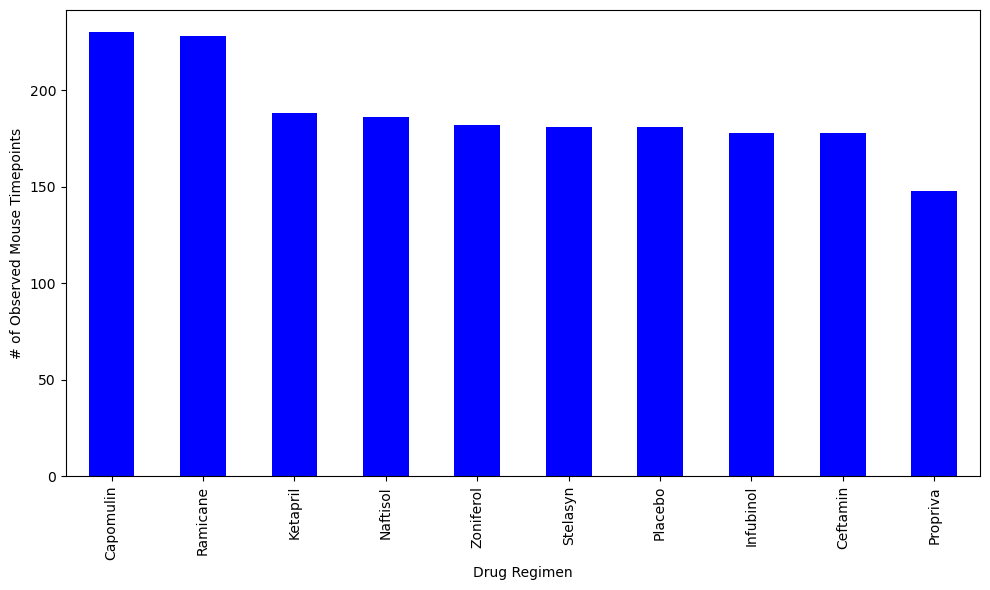

In [39]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_regimen_counts = clean_study_data_complete["Drug Regimen"].value_counts().reset_index()
drug_regimen_counts.columns = ['Drug Regimen', 'Count']

# Create a bar plot using DataFrame.plot()
ax = drug_regimen_counts.plot(kind='bar', x='Drug Regimen', y='Count', figsize=(10, 6), color='blue', legend=False)

# Add labels and title
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("# of Observed Mouse Timepoints")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Display the plot
plt.tight_layout()
plt.show()


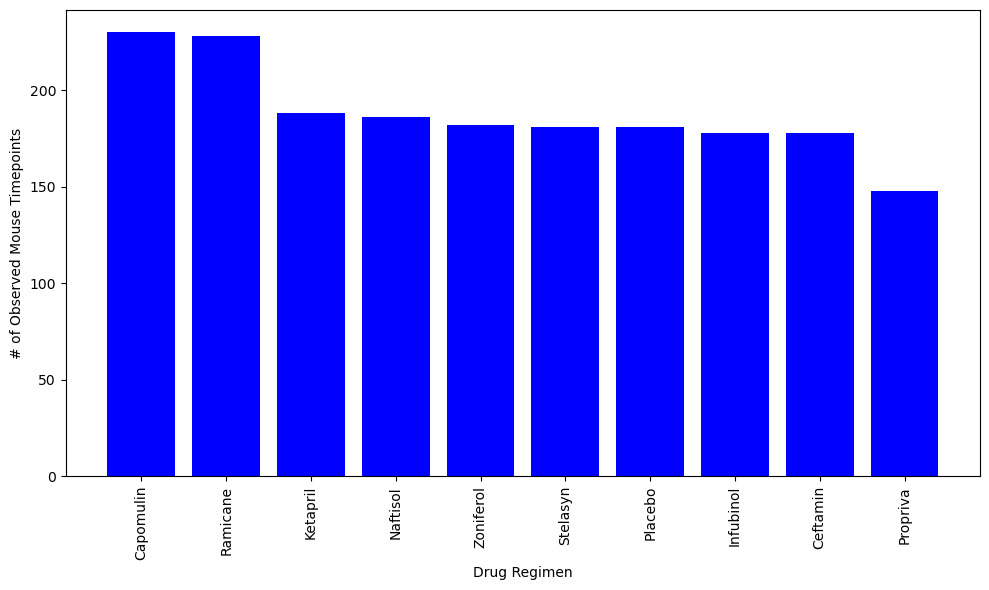

In [41]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = clean_study_data_complete["Drug Regimen"].value_counts().reset_index()
drug_regimen_counts.columns = ['Drug Regimen', 'Count']

# Create a bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(drug_regimen_counts['Drug Regimen'], drug_regimen_counts['Count'], color='blue')

# Add labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()

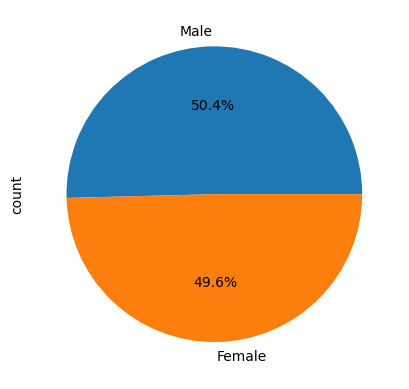

In [14]:
#Get the unique mice with their gender
unique_mice = clean_study_data_complete.drop_duplicates(subset=['Mouse ID'])
gender_counts = unique_mice['Sex'].value_counts()

#Pie chart using Pandas DataFrame.plot() method
gender_pie = gender_counts.plot(kind="pie",autopct='%1.1f%%', y='count')
gender_pie.set_ylabel("count")
plt.axis()
plt.show()

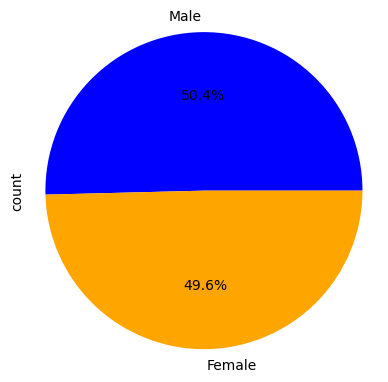

In [15]:

unique_mice = clean_study_data_complete.drop_duplicates(subset=['Mouse ID'])
gender_counts = unique_mice['Sex'].value_counts()

# Generate a pie chart using plotlib
plt.figure(figsize=(4.5, 4.5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=0, colors=['blue', 'orange'])

plt.axis('equal')
plt.ylabel('count')

# Display the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [49]:
pd.set_option("display.max_rows", None)
clean_study_data_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
5,h246,0,45.000000,0,Ketapril,Male,13,30
6,p189,0,45.000000,0,Ketapril,Male,8,28
7,n923,0,45.000000,0,Ketapril,Male,19,30
8,q119,0,45.000000,0,Ketapril,Male,17,30
9,f993,0,45.000000,0,Naftisol,Male,21,28


In [57]:
#Obtain the max timepoint and the corresponding tumor size
max_timeplot_df = clean_study_data_complete.loc[
    clean_study_data_complete.groupby('Mouse ID')['Timepoint'].idxmax()
]

max_timeplot_df = max_timeplot_df.reset_index(drop=True)

max_timeplot_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
5,a401,45,66.794156,4,Zoniferol,Female,8,25
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
8,a457,10,49.783419,0,Ketapril,Female,11,30
9,a492,45,60.122011,1,Stelasyn,Male,20,25


In [67]:
#Make an empty dictionary
drug_tumor_information = {}
drugs_desired = ['Capomulin' , 'Ramicane', 'Infubinol' , 'Ceftamin']

for index, row in max_timeplot_df.iterrows():
    drug = row['Drug Regimen']
    final_tumor_size = row['Tumor Volume (mm3)']
    
    #ignore the undesired drugs
    if drug not in drugs_desired:
        pass

    #add the desired drugs into a dictionary / list to store the data
    else:
        if drug not in drug_tumor_information:
            drug_tumor_information[drug] = [final_tumor_size]
        
        else:
            drug_tumor_information[drug].append(final_tumor_size)

drug_tumor_information

{'Infubinol': [67.97341878,
  65.52574285,
  57.03186187,
  66.08306589,
  72.2267309,
  36.3213458,
  60.96971133,
  62.43540402,
  60.91876652,
  67.28962147,
  66.19691151,
  62.11727887,
  47.01036401,
  60.16518046,
  55.62942846,
  45.69933088,
  54.65654872,
  55.65068132,
  46.25011212,
  54.04860769,
  51.54243058,
  50.00513807,
  58.26844248,
  67.68556862,
  62.75445141],
 'Ceftamin': [62.99935619,
  45.0,
  56.05774909,
  55.74282869,
  48.72207785,
  47.7846818,
  61.84902336,
  68.92318457,
  67.74866174,
  57.91838132,
  46.78453491,
  59.85195552,
  64.29983003,
  59.74190064,
  61.43389223,
  64.19234114,
  45.0,
  52.92534846,
  45.0,
  67.52748237,
  45.0,
  64.63494887,
  61.38666032,
  68.59474498,
  64.72983655],
 'Ramicane': [38.4076183,
  43.0475426,
  38.81036633,
  32.97852192,
  38.34200823,
  33.39765251,
  37.31123552,
  40.65900627,
  29.12847181,
  33.56240217,
  36.37451039,
  31.56046955,
  36.13485243,
  22.05012627,
  30.56462509,
  31.09533505,
  45

In [89]:
#Store iqr values and outliers
iqr_values = {}
outliers = {}

for drug, volumes in drug_tumor_information.items():

    volumes_series = pd.Series(volumes)
    
    # Calculate Q1 and Q3 
    Q1 = volumes_series.quantile(0.25)
    Q3 = volumes_series.quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Determine the lower and upper bounds for potential outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers[drug] = volumes_series[(volumes_series < lower_bound) | (volumes_series > upper_bound)].tolist()
    
    # Store the IQR value
    iqr_values[drug] = IQR

    print(f"{drug} - IQR: {IQR}, Outliers: {outliers[drug]}")

Infubinol - IQR: 11.477135160000003, Outliers: [36.3213458]
Ceftamin - IQR: 15.577752179999997, Outliers: []
Ramicane - IQR: 9.098536719999998, Outliers: []
Capomulin - IQR: 7.781863460000004, Outliers: []


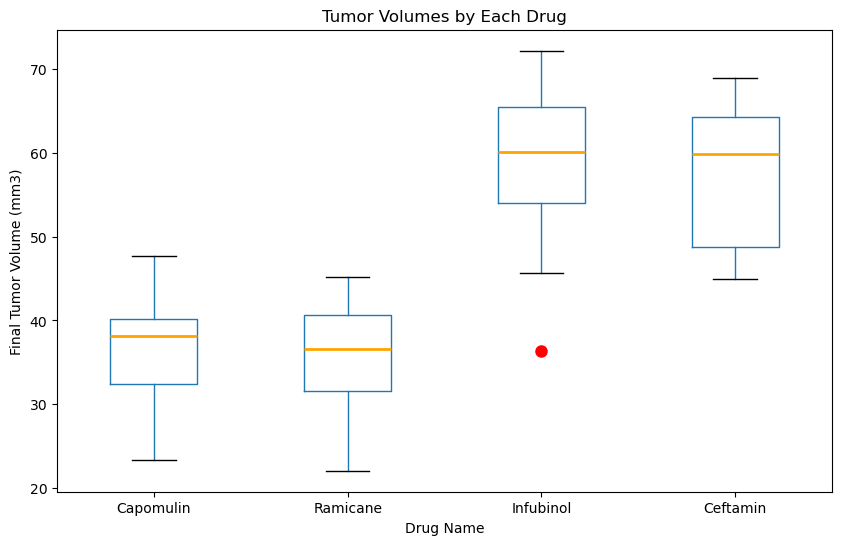

In [111]:
drug_order = ['Capomulin' , 'Ramicane' ,'Infubinol', 'Ceftamin']

# Convert the dictionary to a DataFrame and reorder the columns
df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in drug_tumor_information.items()]))
df = df[drug_order]

# Custom properties for the outliers and median
flierprops = dict(marker='o', color='red', markersize=8, markerfacecolor='red', markeredgecolor='red')
medianprops = dict(color='orange', linewidth=2)

# Create a boxplot with the specified properties
plt.figure(figsize=(10, 6))
df.boxplot(flierprops=flierprops, medianprops=medianprops, grid=False)

# Add title and labels
plt.title('Tumor Volumes by Each Drug')
plt.xlabel('Drug Name')
plt.ylabel('Final Tumor Volume (mm3)')

# Show the plot
plt.show()

## Line and Scatter Plots

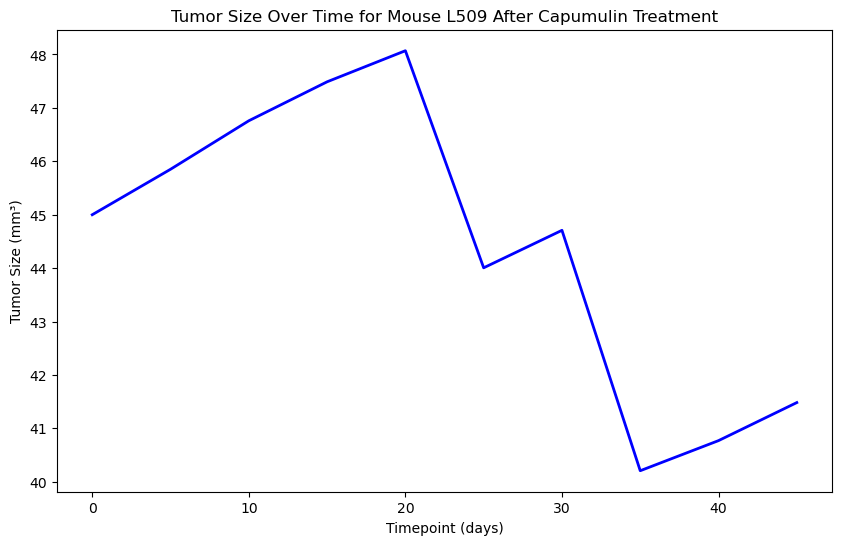

In [131]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# For simplicity I will select the same mouse as in the tutorial

mouse_id = 'l509'

times = list(clean_study_data_complete[clean_study_data_complete['Mouse ID'] == mouse_id]['Timepoint'])
tumor_size = list(clean_study_data_complete[clean_study_data_complete['Mouse ID'] == mouse_id]['Tumor Volume (mm3)'])

plt.figure(figsize=(10, 6))
plt.plot(times, tumor_size, color='blue', linestyle='-', linewidth=2, markersize=6)

# Add title and labels
plt.title('Tumor Size Over Time for Mouse L509 After Capumulin Treatment')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Size (mm³)')

# Show the plot
plt.show()



In [155]:
clean_study_data_complete[clean_study_data_complete['Drug Regimen'] == 'Capomulin']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
230,x401,0,45.000000,0,Capomulin,Female,16,15
231,l509,0,45.000000,0,Capomulin,Male,17,21
232,s710,0,45.000000,0,Capomulin,Female,1,23
233,r157,0,45.000000,0,Capomulin,Male,22,25
234,u364,0,45.000000,0,Capomulin,Male,18,17


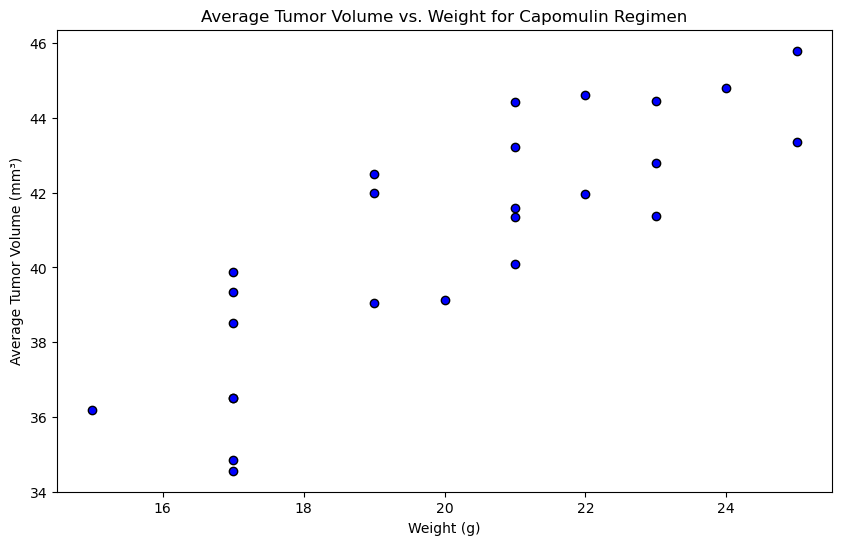

In [157]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = clean_study_data_complete[clean_study_data_complete['Drug Regimen'] == 'Capomulin']

# Group by 'Mouse ID' and calculate the average tumor volume for each mouse
average_tumor_volume_per_mouse = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge this result with the original DataFrame to get the weights
merged_data = pd.merge(average_tumor_volume_per_mouse, capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates(), on='Mouse ID')

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='blue', edgecolor='black')

# Add title and labels
plt.title('Average Tumor Volume vs. Weight for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm³)')

# Show the plot
plt.show()

## Correlation and Regression

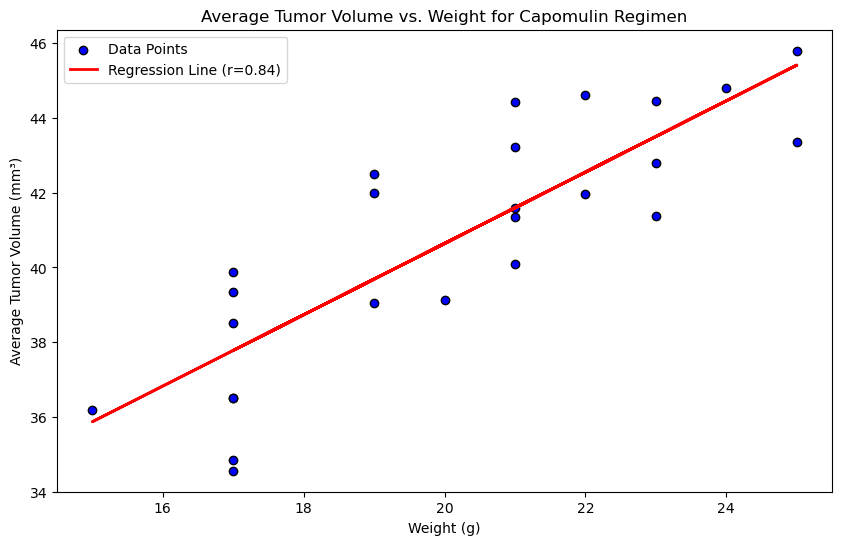

Correlation coefficient: 0.84


In [161]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

capomulin_data = clean_study_data_complete[clean_study_data_complete['Drug Regimen'] == 'Capomulin']

average_tumor_volume_per_mouse = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()


merged_data = pd.merge(average_tumor_volume_per_mouse, capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates(), on='Mouse ID')

#Extract x and y values
weights = merged_data['Weight (g)']
avg_tumor_volumes = merged_data['Tumor Volume (mm3)']

#Fit a regression line to the data
slope, intercept = np.polyfit(weights, avg_tumor_volumes, 1)
regression_line = slope * weights + intercept

#Calculate the correlation coefficient
corr_coef, _ = pearsonr(weights, avg_tumor_volumes)

# Create the scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(weights, avg_tumor_volumes, color='blue', edgecolor='black', label='Data Points')
plt.plot(weights, regression_line, color='red', linewidth=2, label=f'Regression Line (r={corr_coef:.2f})')

# Add title and labels
plt.title('Average Tumor Volume vs. Weight for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm³)')
plt.legend()

# Show the plot
plt.show()

# Print the correlation coefficient
print(f'Correlation coefficient: {corr_coef:.2f}')